In [1]:
import os
print(os.getcwd())
os.chdir('research_files')

/mnt/c/Users/User/MSc_Project/energy_budget_PET_framework-1


In [2]:
#Libraries
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MaxAbsScaler, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.optimize import minimize
import sys
import io
import warnings
from datetime import datetime


data_original = pd.read_csv('privacy_utility_records.csv',  encoding='utf-8')

data = pd.read_csv('privacy_utility_records.csv',  encoding='utf-8')
data = data.drop('dataset_name', axis=1)



In [3]:
def count_outliers_per_record(df, features):
    outlier_counts = []  #
    df_2 = df.copy()
    df_2[features] = df_2[features].apply(pd.to_numeric, errors='coerce')
    #
    for index, row in df_2.iterrows():
        outlier_count = 0
        for feature in features:
            Q1 = df_2[feature].quantile(0.25)
            Q3 = df_2[feature].quantile(0.75)
            IQR = Q3 - Q1
            outlier_step = 1.5 * IQR
            
            
            if row[feature] < Q1 - outlier_step or row[feature] > Q3 + outlier_step:
                outlier_count += 1
        
        outlier_counts.append(outlier_count)
    
    return outlier_counts

In [ ]:
features = [
    'epsilon',
    'avg_cat_uniqueness_ratio',
    'entropy',
    'imbalance_ratio',
    'kurtosis',
    'max_categorical_unique',
    'max_continuous_correlation',
    'max_std_dev',
    'max_variance',
    'mean_categorical_unique',
    'mean_continuous_correlation',
    'mean_std_dev',
    'mean_variance',
    'min_categorical_unique',
    'num_attributes',
    'num_categorical_attributes',
    'num_continuous_attributes',
    'num_records',
    'outlier_percentage',
    'size_mb',
    'skewness'
 ]

features_temp = [
    # 'epsilon',
    'avg_cat_uniqueness_ratio',
    'entropy',
    'imbalance_ratio',
    'kurtosis',
    'max_categorical_unique',
    'max_continuous_correlation',
    'max_std_dev',
    'max_variance',
    'mean_categorical_unique',
    'mean_continuous_correlation',
    'mean_std_dev',
    'mean_variance',
    'min_categorical_unique',
    'num_attributes',
    'num_categorical_attributes',
    'num_continuous_attributes',
    'num_records',
    'outlier_percentage',
    'size_mb',
    'skewness'
]
target_ml = 'accuracy_knn'

Note: In this notebook, we take first 19% of the set, not the last 19%. It provides better results due to better value distribution of the training and test sets

In [ ]:
import warnings
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
def comp_func(actual_values):
    result = []
    for i in range(0, len(actual_values), 2):
        # Make sure there is a pair to compare
        if i + 1 < len(actual_values):
            first = actual_values[i]
            second = actual_values[i + 1]


            if first > second:
                result.append(0)
            elif first == second:
                result.append(2)
            else:
                result.append(1)
    return result
    

def our_ml(dataset, test_size, our_features, estimators, learning_rate, depth, target, scalee):

    # split_index = int((1 - test_size) * len(data))
    split_index = int(test_size * len(data))
    if split_index % 2 != 0:
        split_index += 1
    X = dataset[list(our_features)]
    y = dataset[target]
    X_train = X.iloc[split_index:]
    X_test = X.iloc[:split_index]

    y_train = y.iloc[split_index:]
    y_test = y.iloc[:split_index]

    

    
    gb_model = GradientBoostingRegressor(n_estimators=estimators, learning_rate=learning_rate, max_depth=depth, random_state=42)
    gb_model.fit(X_train, y_train)

    y_pred = gb_model.predict(X_test)
    print('Conditions:')
    print(f'Size: {len(dataset)}')
    print(f'Test size percent is: {test_size}')
    print(f'Attributes: {our_features}')
    print('Actual')
    print(list(y_test))
    print('Prediction')
    print(y_pred)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Gradient Boosting MSE:", mse)
    print("Gradient Boosting R²:", r2)

    feature_importances = gb_model.feature_importances_


    importances = pd.Series(feature_importances, index=our_features)
    
    if len(y_pred) % 2 == 0:
        aa = []
        res_act = comp_func(y_test.reset_index(drop=True))
        res_pred = comp_func(y_pred)
        for i in range(len(res_act)):
            if res_act[i] == res_pred[i]:
                aa.append(True)
            else:
                aa.append(False)
        
        print(aa)
        
        num = aa.count(True)
        length = len(aa)
        print(f'Accuracy of the comparison which one more consumable/accurate/riskier: {(num / length) * 100} %')
        
        print('Prediction vs Actual')
        y_test_2 = list(y_test)
        ll = 0
        mm = 0
        for i in range(len(y_pred)):
            ll += 1
            print(f'{y_pred[i]}  -  {y_test_2[i]}' )
            if ll % 2 == 0:
                print(aa[mm])
                mm += 1
                print('\n')
            ...
    else:
        print('Fix the test size for even number of values.')
        y_pred = 0
        y_test_2 = 0


  
    return gb_model, y_pred, y_test_2, importances


def lightgbm_ml(our_data, our_features, target, perc, scalee, n_estimators=100, learning_rate=0.1, depth = -1):
    warnings.simplefilter(action='ignore', category=UserWarning)
    test_size = perc
    # split_index = int((1 - test_size) * len(our_data))
    split_index = int(test_size * len(data))
    if split_index % 2 != 0:
        split_index += 1
    X = our_data[list(our_features)]
    y = our_data[target]
    X_train = X.iloc[split_index:]
    X_test = X.iloc[:split_index]

    y_train = y.iloc[split_index:]
    y_test = y.iloc[:split_index]
 
 

    model = lgb.LGBMRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=depth, random_state=42, verbose=-1)
    
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred = np.clip(y_pred, a_min=0, a_max=None)  # Ensure no negative predictions
    

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    if len(y_pred) % 2 == 0 and len(y_test) % 2 == 0:
        aa = []
        y_test_2 = y_test.reset_index(drop=True)
        y_pred_2 = pd.Series(y_pred).reset_index(drop=True)
        res_act = comp_func(y_test_2)
        res_pred = comp_func(y_pred_2)
        
        for i in range(len(res_act)):
            if res_act[i] == res_pred[i]:
                aa.append(True)
            else:
                aa.append(False)

        num = aa.count(True)
        length = len(aa)
        acc = (num / length) * 100
    else:
        aa = []
        acc = 0

    print('\n')
    print(f'Conditions for {target}:')
    print("LightGBM Regression")
    if scalee == 1:
        print("With Scaler")
    print(f'Number of Estimators: {n_estimators}')
    print(f'Learning Rate: {learning_rate}')
    print(f"Best MSE: {mse:.10f}")
    print(f"Best R²: {r2:.10f}")
    print(f'Test size: {perc}')
    print(f"Best Feature Combination: {our_features}")

    print(f'Accuracy: {acc}%')
    
    print("Feature Importances:")
    single_importances_series = pd.Series(model.feature_importances_ , index=our_features)
    importances_percentages = (single_importances_series / single_importances_series.sum())
    print(importances_percentages)
   
   
        
    
    # importances_sorted = single_importances_series.sort_values(ascending=False)
    return model, y_pred.tolist(), y_test.tolist(), importances_percentages

def lightgbm_ml_original(our_data, our_features, target, perc, scalee, n_estimators=100, learning_rate=0.1, depth = -1):
    warnings.simplefilter(action='ignore', category=UserWarning)
    test_size = perc
    split_index = int((1 - test_size) * len(our_data))
    # split_index = int(test_size * len(data))
    if split_index % 2 != 0:
        split_index += 1
    X = our_data[list(our_features)]
    y = our_data[target]
    X_train = X.iloc[:split_index]
    X_test = X.iloc[split_index:]

    y_train = y.iloc[:split_index]
    y_test = y.iloc[split_index:]
 

    model = lgb.LGBMRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=depth, random_state=42, verbose=-1)
    

    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)
    y_pred = np.clip(y_pred, a_min=0, a_max=None)  # Ensure no negative predictions
    

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    if len(y_pred) % 2 == 0 and len(y_test) % 2 == 0:
        aa = []
        y_test_2 = y_test.reset_index(drop=True)
        y_pred_2 = pd.Series(y_pred).reset_index(drop=True)
        res_act = comp_func(y_test_2)
        res_pred = comp_func(y_pred_2)
        
        for i in range(len(res_act)):
            if res_act[i] == res_pred[i]:
                aa.append(True)
            else:
                aa.append(False)

        num = aa.count(True)
        length = len(aa)
        acc = (num / length) * 100
    else:
        aa = []
        acc = 0

    print('\n')
    print(f'Conditions for {target}:')
    print("LightGBM Regression")
    if scalee == 1:
        print("With Scaler")
    print(f'Number of Estimators: {n_estimators}')
    print(f'Learning Rate: {learning_rate}')
    print(f"Best MSE: {mse:.10f}")
    print(f"Best R²: {r2:.10f}")
    print(f'Test size: {perc}')
    print(f"Best Feature Combination: {our_features}")

    print(f'Accuracy: {acc}%')
    
    print("Feature Importances:")
    single_importances_series = pd.Series(model.feature_importances_ , index=our_features)
    importances_percentages = (single_importances_series / single_importances_series.sum())
    print(importances_percentages)
   
   
    
    # importances_sorted = single_importances_series.sort_values(ascending=False)
    return model, y_pred.tolist(), y_test.tolist(), importances_percentages



# Best result, that was acquired using Brute Force!

In [6]:

brute_force_features_1 = ['epsilon', 'avg_cat_uniqueness_ratio', 'entropy', 'imbalance_ratio', 'kurtosis', 'num_records', 'max_continuous_correlation', 'mean_std_dev', 'mean_continuous_correlation', 'mean_categorical_unique', 'min_categorical_unique']

#our_ml(dataset, test_size, our_features, estimators, learning_rate, depth, target, scalee)
# best_1, best_predictions, best_actual, best_importances  =  our_ml(data, 0.19, best_features_1, 150, 1.5, 3, target_ml, 0)

#lightgbm_ml(our_data, our_features, target, perc, scalee, n_estimators=100, learning_rate=0.1)
brute_force_1, brute_force_predictions, brute_force_actual, brute_force_importances  = lightgbm_ml_original(data, brute_force_features_1, target_ml, 0.19, 0, 100, 0.1)
"""  

Conditions for accuracy_knn:
LightGBM Regression
Number of Estimators: 100
Learning Rate: 0.1
Best MSE: 0.0010437081
Best R²: 0.1159591343
Test size: 0.19
Best Feature Combination: ['epsilon', 'avg_cat_uniqueness_ratio', 'entropy', 'imbalance_ratio', 'kurtosis', 'num_records', 'max_continuous_correlation', 'mean_std_dev', 'mean_continuous_correlation', 'mean_categorical_unique', 'min_categorical_unique']
Accuracy: 72.41379310344827%
Feature Importances:
epsilon                      0.119
avg_cat_uniqueness_ratio     0.073
entropy                      0.115
imbalance_ratio              0.109
kurtosis                     0.117
num_records                  0.056
max_continuous_correlation    0.053
mean_std_dev                 0.165
mean_continuous_correlation   0.144
mean_categorical_unique      0.045
min_categorical_unique       0.006
dtype: float64
"""



Conditions for accuracy_knn:
LightGBM Regression
Number of Estimators: 100
Learning Rate: 0.1
Best MSE: 0.0010437081
Best R²: 0.1159591343
Test size: 0.19
Best Feature Combination: ['epsilon', 'avg_cat_uniqueness_ratio', 'entropy', 'imbalance_ratio', 'kurtosis', 'num_records', 'max_continuous_correlation', 'mean_std_dev', 'mean_continuous_correlation', 'mean_categorical_unique', 'min_categorical_unique']
Accuracy: 72.41379310344827%
Feature Importances:
epsilon                       0.118857
avg_cat_uniqueness_ratio      0.073143
entropy                       0.115429
imbalance_ratio               0.108571
kurtosis                      0.116571
num_records                   0.056000
max_continuous_correlation     0.052571
mean_std_dev                  0.164571
mean_continuous_correlation    0.144000
mean_categorical_unique       0.044571
min_categorical_unique        0.005714
dtype: float64


"  \n\nConditions for accuracy_knn:\nLightGBM Regression\nNumber of Estimators: 100\nLearning Rate: 0.1\nBest MSE: 0.0010437081\nBest R²: 0.1159591343\nTest size: 0.19\nBest Feature Combination: ['epsilon', 'avg_cat_uniqueness_ratio', 'entropy', 'imbalance_ratio', 'kurtosis', 'num_records', 'max_continuous_correlation', 'mean_std_dev', 'mean_continuous_correlation', 'mean_categorical_unique', 'min_categorical_unique']\nAccuracy: 72.41379310344827%\nFeature Importances:\nepsilon                      0.119\navg_cat_uniqueness_ratio     0.073\nentropy                      0.115\nimbalance_ratio              0.109\nkurtosis                     0.117\nnum_records                  0.056\nmax_continuous_correlation    0.053\nmean_std_dev                 0.165\nmean_continuous_correlation   0.144\nmean_categorical_unique      0.045\nmin_categorical_unique       0.006\ndtype: float64\n"

# Now, Let's take a look at if the feature analyses will demonstrate better results.

## Sequential Feature Selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import lightgbm as lgb

import numpy as np

def comp_func(actual_values):
    result = []
    for i in range(0, len(actual_values), 2):
        # Make sure there is a pair to compare
        if i + 1 < len(actual_values):
            first = actual_values[i]
            second = actual_values[i + 1]


            if first > second:
                result.append(0)
            elif first == second:
                result.append(2)
            else:
                result.append(1)
    return result

def our_sfs_ml(dataset, test_size, our_features, estimators, learning_rate, depth, n_features, scalee, direction_s = 'forward'):
    

    split_index = int(test_size * len(data))
    if split_index % 2 != 0:
        split_index += 1
    X = dataset[list(our_features)]
    y = dataset[target_ml]
    X_train = X.iloc[split_index:]
    X_test = X.iloc[:split_index]

    y_train = y.iloc[split_index:]
    y_test = y.iloc[:split_index]
   

    
    # gb_model = GradientBoostingRegressor(n_estimators=estimators, learning_rate=learning_rate, max_depth=depth, random_state=42)
    gb_model = lgb.LGBMRegressor(n_estimators=estimators, learning_rate=learning_rate, max_depth=depth, random_state=42, verbose=-1, n_jobs=2)
    
    # Perform Sequential Feature Selection
    sfs = SequentialFeatureSelector(gb_model, n_features_to_select=n_features, direction=direction_s, scoring='r2', n_jobs=-1)
    sfs.fit(X_train, y_train)
    
    selected_features = list(X_train.columns[sfs.get_support()])
    
    if 'epsilon' not in selected_features:
        return sfs, selected_features, -100, -100, None, 0

    # Refit the model using only the selected features
    gb_model.fit(X_train[selected_features], y_train)

    # Make predictions on the test set using the refitted model
    y_pred = gb_model.predict(X_test[selected_features])
    y_pred = np.clip(y_pred, a_min=0, a_max=None)


    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    feature_importances = gb_model.feature_importances_

    # Create a DataFrame with feature names and their importances
    selected_features_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': feature_importances
    })

    # Normalize importances to get percentages
    selected_features_df['Importance_Percentage'] = 100 * (selected_features_df['Importance'] / selected_features_df['Importance'].sum())
    

    selected_features_df = selected_features_df.sort_values(by='Importance_Percentage', ascending=False)

    if len(y_pred) % 2 == 0:
        aa = []
        res_act = comp_func(y_test.reset_index(drop=True))
        res_pred = comp_func(y_pred)
        for i in range(len(res_act)):
            if res_act[i] == res_pred[i]:
                aa.append(True)
            else:
                aa.append(False)

        num = aa.count(True)
        length = len(aa)
        acc = (num / length) * 100
        if acc > 80 and r2 > 0.8:
            print(f'Accuracy of the comparison which one more consumable/accurate/riskier: {acc}%')
            print(f'R2: {r2}')
            print(f'MSE: {mse}')
            print(f'Selected features: {selected_features}')
            print(f'Number of estimators: {estimators}')
            print(f'Learning rate: {learning_rate}')
        

    return gb_model, selected_features, r2, mse, selected_features_df, acc





Conditions for accuracy_knn:
LightGBM Regression
Number of Estimators: 100
Learning Rate: 0.1
Best MSE: 0.0322306146
Best R²: 0.2212372645
Test size: 0.19
Best Feature Combination: ['epsilon', 'avg_cat_uniqueness_ratio', 'entropy', 'imbalance_ratio', 'kurtosis', 'max_categorical_unique', 'max_continuous_correlation', 'max_std_dev', 'max_variance', 'mean_categorical_unique', 'mean_continuous_correlation', 'mean_std_dev', 'mean_variance', 'min_categorical_unique', 'num_attributes', 'num_categorical_attributes', 'num_continuous_attributes', 'num_records', 'outlier_percentage', 'size_mb', 'skewness']
Accuracy: 79.3103448275862%
Feature Importances:
epsilon                       0.152844
avg_cat_uniqueness_ratio      0.042654
entropy                       0.043839
imbalance_ratio               0.053318
kurtosis                      0.045024
max_categorical_unique        0.041469
max_continuous_correlation     0.034360
max_std_dev                   0.049763
max_variance                  0.

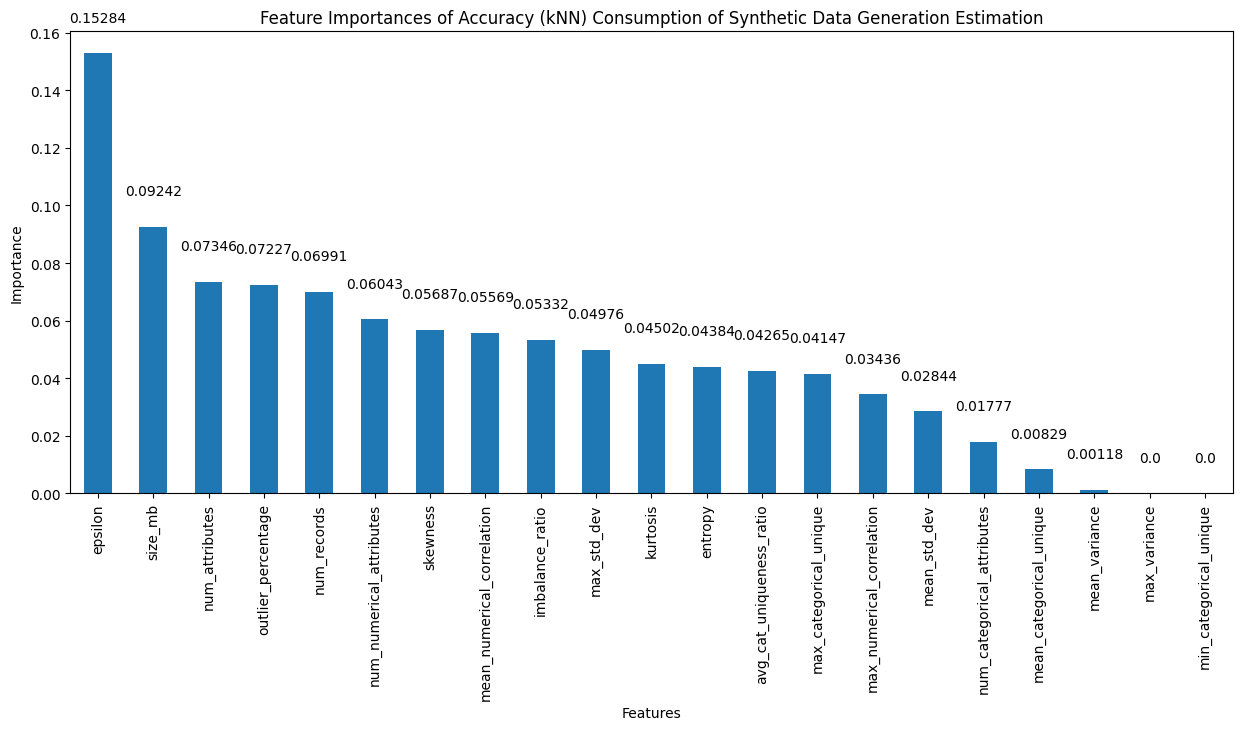

In [ ]:
a, aa, aaa, all_importances_regular = lightgbm_ml(data, features, target_ml, 0.19, 0, 100, 0.1)


importances_sorted = all_importances_regular.sort_values(ascending=False)
# pd.options.display.float_format = '{:.4f}'.format

importances_sorted = importances_sorted.round(5)
print(importances_sorted)

plt.figure(figsize=(15, 6))
ax = importances_sorted.plot(kind='bar')
for i, v in enumerate(importances_sorted.values):
    ax.text(i, v + 0.01, f'{v}', ha='center', va='bottom')
plt.title('Feature Importances of Accuracy (kNN) Consumption of Synthetic Data Generation Estimation')
plt.xlabel('Features')
plt.ylabel('Importance')
# plt.savefig('energy_importances.png')
plt.show()
lists_ttt = [importances_sorted[:(i)].index.to_list() for i in range(5, 21)]


In [9]:
#LightGBM
start_time_total = datetime.now()

ests = [100]
lss = 0.1
existing_r2s_1 = set()

for l in lists_ttt:
    start_time = datetime.now()
    for i in range(4, len(l)):
        print(f'\r{i - 3} out of {len(l) - 4 }', end='\r',  flush=True)
        for es in ests:
            
            sfs_params, sfs_features, o_r2, o_mse, selected_features_df, o_acc = our_sfs_ml(
                        dataset=data, test_size=0.19, our_features=l, 
                        estimators=es, learning_rate=0.1, depth=-1, n_features=i, scalee=0, direction_s='forward'
                    )
            
            if o_r2 < 0.3:
                continue
            if o_r2 in existing_r2s_1:
                continue
            existing_r2s_1.add(o_r2)
            print(f'Learning rate: {lss}')
            print(f'Estimators: {es}')
            print(f'Input Features: {l}')
            print(f'Number of Features to choose {i}')
            print(sfs_features)
            print(f'R2: {o_r2}')
            print( f'MSE: {o_mse}')
            print(  selected_features_df)
            print(f'Comparison Accuracy: {o_acc}')
            print('\n')


    end_time = datetime.now()

    elapsed_time = (end_time - start_time).total_seconds() / 60

    print(f"Elapsed time: {elapsed_time:.2f} minutes with list size {len(l)}")
end_time_total = datetime.now()

elapsed_time_total = (end_time_total - start_time_total).total_seconds() / 60

print(f"Total lapsed time: {elapsed_time_total:.2f} minutes")
""" 
Learning rate: 0.1
Estimators: 100
Input Features: ['epsilon', 'size_mb', 'num_attributes', 'outlier_percentage', 'num_records', 'num_continuous_attributes', 'skewness', 'mean_continuous_correlation', 'imbalance_ratio', 'max_std_dev', 'kurtosis']
Number of Features to choose 7
['epsilon', 'size_mb', 'outlier_percentage', 'num_continuous_attributes', 'skewness', 'mean_continuous_correlation', 'kurtosis']
R2: 0.3873094000796522
MSE: 0.025357395387157058
                      Feature  Importance  Importance_Percentage
0                     epsilon         138              16.507177
1                     size_mb         137              16.387560
2          outlier_percentage         134              16.028708
3    num_continuous_attributes         132              15.789474
5  mean_continuous_correlation         109              13.038278
6                    kurtosis         107              12.799043
4                    skewness          79               9.449761
Comparison Accuracy: 75.86206896551724

 """

Elapsed time: 0.22 minutes with list size 5
Learning rate: 0.1
Estimators: 100
Input Features: ['epsilon', 'size_mb', 'num_attributes', 'outlier_percentage', 'num_records', 'num_continuous_attributes']
Number of Features to choose 5
['epsilon', 'size_mb', 'num_attributes', 'outlier_percentage', 'num_continuous_attributes']
R2: 0.31299642956477647
MSE: 0.028432982601951647
                    Feature  Importance  Importance_Percentage
3        outlier_percentage         237              28.214286
1                   size_mb         171              20.357143
2            num_attributes         158              18.809524
4  num_continuous_attributes         151              17.976190
0                   epsilon         123              14.642857
Comparison Accuracy: 62.06896551724138


Elapsed time: 0.04 minutes with list size 6
Learning rate: 0.1
Estimators: 100
Input Features: ['epsilon', 'size_mb', 'num_attributes', 'outlier_percentage', 'num_records', 'num_continuous_attributes', 'sk

" \nLearning rate: 0.1\nEstimators: 100\nInput Features: ['epsilon', 'size_mb', 'num_attributes', 'outlier_percentage', 'num_records', 'num_continuous_attributes', 'skewness', 'mean_continuous_correlation', 'imbalance_ratio', 'max_std_dev', 'kurtosis']\nNumber of Features to choose 7\n['epsilon', 'size_mb', 'outlier_percentage', 'num_continuous_attributes', 'skewness', 'mean_continuous_correlation', 'kurtosis']\nR2: 0.3873094000796522\nMSE: 0.025357395387157058\n                      Feature  Importance  Importance_Percentage\n0                     epsilon         138              16.507177\n1                     size_mb         137              16.387560\n2          outlier_percentage         134              16.028708\n3    num_continuous_attributes         132              15.789474\n5  mean_continuous_correlation         109              13.038278\n6                    kurtosis         107              12.799043\n4                    skewness          79               9.449761\nCom

In [10]:
#LightGBM
start_time_total = datetime.now()

ests = [100]
lss = 0.1
existing_r2s_2 = set()

for l in lists_ttt:
    start_time = datetime.now()
    for i in range(4, len(l)):
        print(f'\r{i - 3} out of {len(l) - 4 }', end='\r',  flush=True)
        for es in ests:
            
            sfs_params, sfs_features, o_r2, o_mse, selected_features_df, o_acc = our_sfs_ml(
                        dataset=data, test_size=0.19, our_features=l, 
                        estimators=es, learning_rate=0.1, depth=-1, n_features=i, scalee=0, direction_s='backward'
                    )
            
            if o_r2 < 0.3:
                continue
            if o_r2 in existing_r2s_1:
                continue
            existing_r2s_1.add(o_r2)
            print(f'Learning rate: {lss}')
            print(f'Estimators: {es}')
            print(f'Input Features: {l}')
            print(f'Number of Features to choose {i}')
            print(sfs_features)
            print(f'R2: {o_r2}')
            print( f'MSE: {o_mse}')
            print(  selected_features_df)
            print(f'Comparison Accuracy: {o_acc}')
            print('\n')


    end_time = datetime.now()

    elapsed_time = (end_time - start_time).total_seconds() / 60

    print(f"Elapsed time: {elapsed_time:.2f} minutes with list size {len(l)}")
end_time_total = datetime.now()

elapsed_time_total = (end_time_total - start_time_total).total_seconds() / 60

print(f"Total lapsed time: {elapsed_time_total:.2f} minutes")
"""  
Learning rate: 0.1
Estimators: 100
Input Features: ['epsilon', 'size_mb', 'num_attributes', 'outlier_percentage', 'num_records', 'num_continuous_attributes', 'skewness', 'mean_continuous_correlation', 'imbalance_ratio', 'max_std_dev', 'kurtosis', 'entropy', 'avg_cat_uniqueness_ratio', 'max_categorical_unique']
Number of Features to choose 6
['epsilon', 'outlier_percentage', 'skewness', 'mean_continuous_correlation', 'kurtosis', 'entropy']
R2: 0.36107484190641803
MSE: 0.026443163741514963
                      Feature  Importance  Importance_Percentage
5                     entropy         190              21.664766
1          outlier_percentage         170              19.384265
3  mean_continuous_correlation         162              18.472064
0                     epsilon         126              14.367161
4                    kurtosis         124              14.139111
2                    skewness         105              11.972634
Comparison Accuracy: 86.20689655172413

Learning rate: 0.1
Estimators: 100
Input Features: ['epsilon', 'size_mb', 'num_attributes', 'outlier_percentage', 'num_records', 'num_continuous_attributes', 'skewness', 'mean_continuous_correlation', 'imbalance_ratio', 'max_std_dev', 'kurtosis']
Number of Features to choose 9
['epsilon', 'size_mb', 'outlier_percentage', 'num_records', 'num_continuous_attributes', 'skewness', 'mean_continuous_correlation', 'imbalance_ratio', 'kurtosis']
R2: 0.41083914854415227
MSE: 0.02438357085769268
                      Feature  Importance  Importance_Percentage
0                     epsilon         127              15.301205
4    num_continuous_attributes         114              13.734940
1                     size_mb         111              13.373494
7             imbalance_ratio          99              11.927711
2          outlier_percentage          98              11.807229
6  mean_continuous_correlation          89              10.722892
5                    skewness          71               8.554217
8                    kurtosis          61               7.349398
3                 num_records          60               7.228916
Comparison Accuracy: 79.3103448275862
 """

Elapsed time: 0.01 minutes with list size 5
Elapsed time: 0.03 minutes with list size 6
Elapsed time: 0.06 minutes with list size 7
Elapsed time: 0.11 minutes with list size 8
Elapsed time: 0.18 minutes with list size 9
Elapsed time: 0.25 minutes with list size 10
Learning rate: 0.1
Estimators: 100
Input Features: ['epsilon', 'size_mb', 'num_attributes', 'outlier_percentage', 'num_records', 'num_continuous_attributes', 'skewness', 'mean_continuous_correlation', 'imbalance_ratio', 'max_std_dev', 'kurtosis']
Number of Features to choose 6
['epsilon', 'size_mb', 'outlier_percentage', 'num_continuous_attributes', 'skewness', 'kurtosis']
R2: 0.3287046789542094
MSE: 0.027782866065710187
                    Feature  Importance  Importance_Percentage
2        outlier_percentage         163              19.497608
3  num_continuous_attributes         158              18.899522
0                   epsilon         148              17.703349
1                   size_mb         143              17.1

"  \nLearning rate: 0.1\nEstimators: 100\nInput Features: ['epsilon', 'size_mb', 'num_attributes', 'outlier_percentage', 'num_records', 'num_continuous_attributes', 'skewness', 'mean_continuous_correlation', 'imbalance_ratio', 'max_std_dev', 'kurtosis', 'entropy', 'avg_cat_uniqueness_ratio', 'max_categorical_unique']\nNumber of Features to choose 6\n['epsilon', 'outlier_percentage', 'skewness', 'mean_continuous_correlation', 'kurtosis', 'entropy']\nR2: 0.36107484190641803\nMSE: 0.026443163741514963\n                      Feature  Importance  Importance_Percentage\n5                     entropy         190              21.664766\n1          outlier_percentage         170              19.384265\n3  mean_continuous_correlation         162              18.472064\n0                     epsilon         126              14.367161\n4                    kurtosis         124              14.139111\n2                    skewness         105              11.972634\nComparison Accuracy: 86.20689655

In [5]:
best_features_1 = ['epsilon', 'size_mb', 'outlier_percentage', 'num_records', 
                   'num_continuous_attributes', 'skewness', 'mean_continuous_correlation', 'imbalance_ratio', 'kurtosis']





best_model, best_predictions, best_actual, best_importances = lightgbm_ml(data, best_features_1, target_ml, 0.19, 0, 100, 0.1)



Conditions for accuracy_knn:
LightGBM Regression
Number of Estimators: 100
Learning Rate: 0.1
Best MSE: 0.0243835709
Best R²: 0.4108391485
Test size: 0.19
Best Feature Combination: ['epsilon', 'size_mb', 'outlier_percentage', 'num_records', 'num_continuous_attributes', 'skewness', 'mean_continuous_correlation', 'imbalance_ratio', 'kurtosis']
Accuracy: 79.3103448275862%
Feature Importances:
epsilon                        0.153012
size_mb                        0.133735
outlier_percentage             0.118072
num_records                    0.072289
num_continuous_attributes      0.137349
skewness                       0.085542
mean_continuous_correlation    0.107229
imbalance_ratio                0.119277
kurtosis                       0.073494
dtype: float64


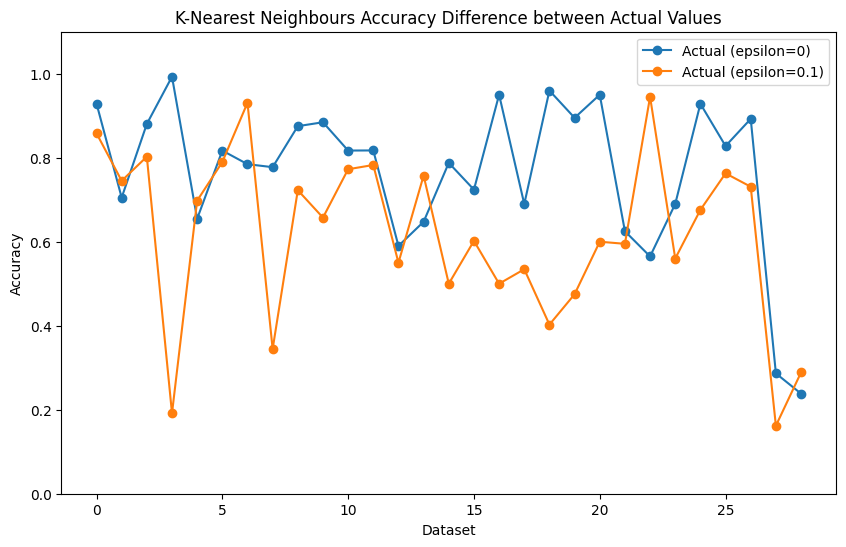

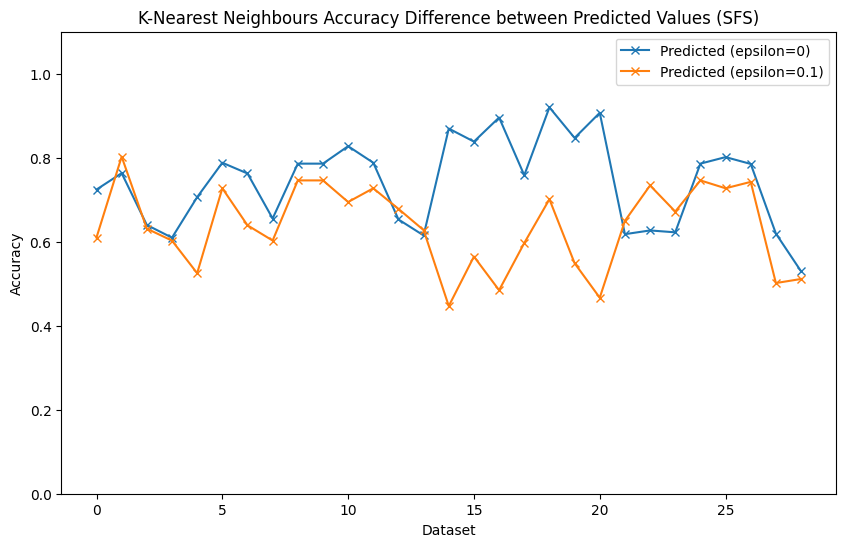

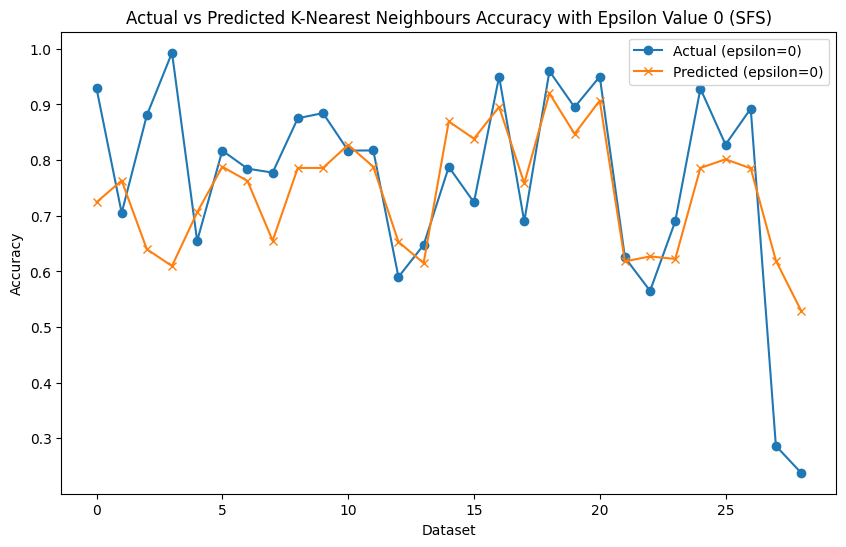

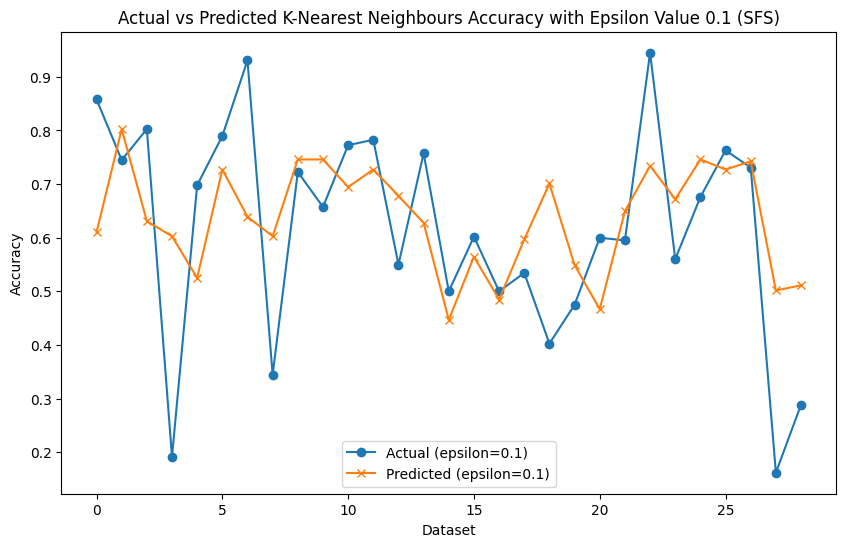

In [ ]:
import matplotlib.pyplot as plt

# Separate the data by epsilon
best_actual_0 = [best_actual[i] for i in range(0, len(best_actual), 2)]   # Actual values for epsilon 0
best_actual_01 = [best_actual[i] for i in range(1, len(best_actual), 2)]  # Actual values for epsilon 0.1
y_pred_0 = [best_predictions[i] for i in range(0, len(best_predictions), 2)]  # Predicted values for epsilon 0
y_pred_01 = [best_predictions[i] for i in range(1, len(best_predictions), 2)] # Predicted values for epsilon 0.1


x_indices_0 = range(len(best_actual_0))     # Indices for epsilon 0
x_indices_01 = range(len(best_actual_01))   # Indices for epsilon 0.1
y_min = 0
# y_max = max(max(best_actual_0), max(best_actual_01), max(y_pred_0), max(y_pred_01))
y_max = 1.1

# Plot 1: Difference between actual values
plt.figure(figsize=(10, 6))
plt.plot(x_indices_0, best_actual_0, label='Actual (epsilon=0)', marker='o')
plt.plot(x_indices_01, best_actual_01, label='Actual (epsilon=0.1)', marker='o')
plt.ylim(y_min, y_max)
plt.title('K-Nearest Neighbours Accuracy Difference between Actual Values')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('knn_accuracy_difference_between_actual_values.png') 
plt.show()

# Plot 2: Difference between predicted values
plt.figure(figsize=(10, 6))
plt.plot(x_indices_0, y_pred_0, label='Predicted (epsilon=0)', marker='x')
plt.plot(x_indices_01, y_pred_01, label='Predicted (epsilon=0.1)', marker='x')
plt.ylim(y_min, y_max)
plt.title('K-Nearest Neighbours Accuracy Difference between Predicted Values (SFS)')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('knn_accuracy_difference_between_predicted_values.png')  
plt.show()

# Plot 3: Actual vs Predicted for epsilon 0
plt.figure(figsize=(10, 6))
plt.plot(x_indices_0, best_actual_0, label='Actual (epsilon=0)', marker='o')
plt.plot(x_indices_0, y_pred_0, label='Predicted (epsilon=0)', marker='x')
plt.title('Actual vs Predicted K-Nearest Neighbours Accuracy with Epsilon Value 0 (SFS)')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('knn_accuracy_actual_vs_predicted_epsilon_0.png') 
plt.show()

# Plot 4: Actual vs Predicted for epsilon 0.1
plt.figure(figsize=(10, 6))
plt.plot(x_indices_01, best_actual_01, label='Actual (epsilon=0.1)', marker='o')
plt.plot(x_indices_01, y_pred_01, label='Predicted (epsilon=0.1)', marker='x')
plt.title('Actual vs Predicted K-Nearest Neighbours Accuracy with Epsilon Value 0.1 (SFS)')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('knn_accuracy_actual_vs_predicted_epsilon_01.png') 
plt.show()


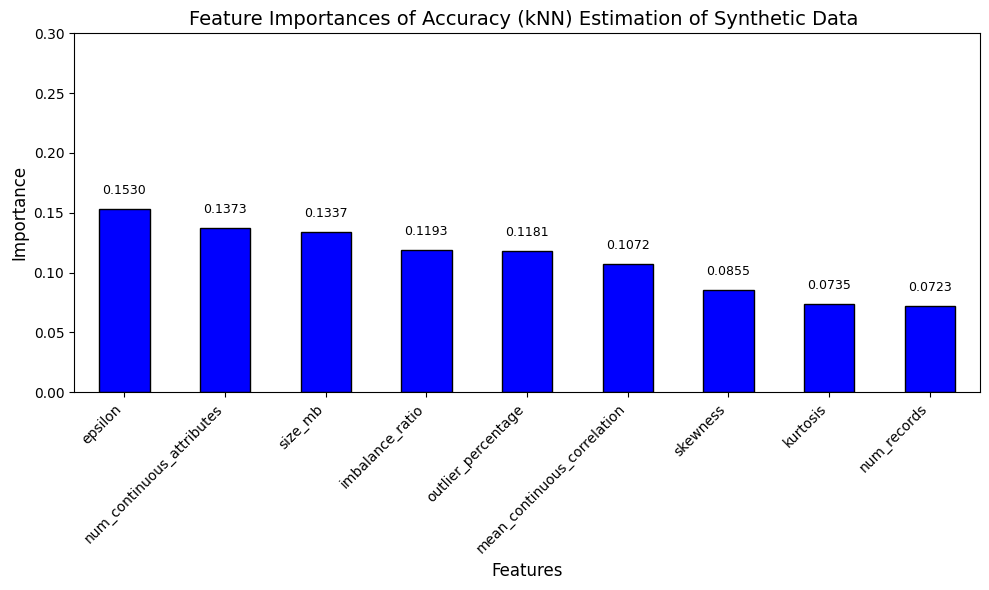

In [ ]:
importances_sorted = best_importances.sort_values(ascending=False)

# Set display options for rounded float format
pd.options.display.float_format = '{:.3f}'.format  # Set to 3 decimal places

# Plot the feature importances
plt.figure(figsize=(10, 6))
ax = importances_sorted.plot(kind='bar', color='blue', edgecolor='black')

# Add rounded values above bars
for i, v in enumerate(importances_sorted.values):
    ax.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=9)  # Rounded to 3 decimals


plt.title('Feature Importances of Accuracy (kNN) Estimation of Synthetic Data ', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.ylim(0, 0.3)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate feature names for better readability
plt.tight_layout()  

# Save and display the plot
plt.savefig('knn_accuracy_importances.png')
plt.show()


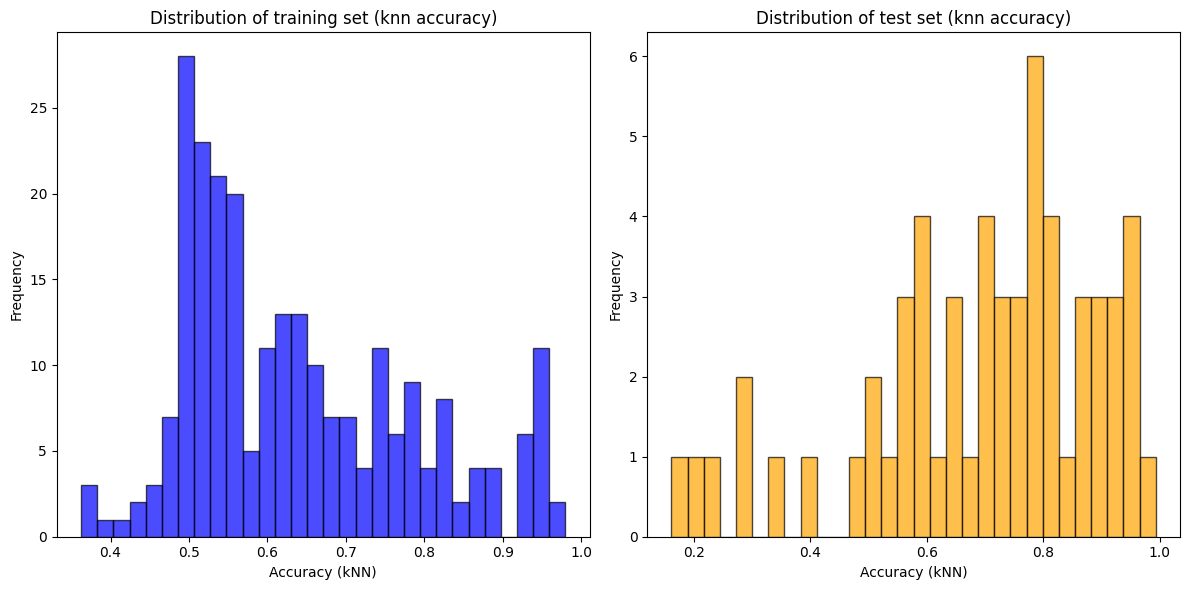

In [ ]:
split_index = int(0.19 * len(data))
if split_index % 2 != 0:
    split_index += 1
y = data[target_ml]
y_train = y.iloc[split_index:]
y_test = y.iloc[:split_index]

plt.figure(figsize=(12, 6))

# Histogram for y_train
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of training set (knn accuracy)')
plt.xlabel('Accuracy (kNN)')
plt.ylabel('Frequency')

# Histogram for y_test
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribution of test set (knn accuracy)')
plt.xlabel('Accuracy (kNN)')
plt.ylabel('Frequency')
plt.savefig('knn_accuracy_distribution.png')

plt.tight_layout()
plt.show()